# Exercises - Data Preparation

[*Codeup Lesson*](https://ds.codeup.com/9-timeseries/3-prep/)

In [1]:
from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain

In [2]:
import acquire as acq

In [3]:
import prepare as prep

In [4]:
import wrangle_zach as wz
from wrangle_zach import set_combo_data

In [5]:
import wrangle_opsd

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

### Using your store items data you acquired in lesson 1 exercises:

In [11]:
df_sales = set_combo_data(splain=True, splain_inner=False, debug=True)
df_sales.head()

COMBO SHAPE:
(913000, 14)

COMBO INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
sale_id          913000 non-null int64
item_id          913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null object
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB
None

COMBO DESCRIPTION:
                  count          mean           std           min  \
sale_id        913000.0  4.565005e+05  2.635605e+05  1.000000e+00   
item_id        913000.0  2.550000e+01  1.443088e+01  1.000000e+00  

,sale_id,item_id,sale_amount,sale_date,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,2,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,3,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,4,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,5,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


1. **Convert date column to datetime format.**

In [12]:
fmt = '%a, %d %b %Y %H:%M:%S %Z'
df_sales.sale_date = pd.to_datetime(df_sales.sale_date, format=fmt)
df_sales.head()

,sale_id,item_id,sale_amount,sale_date,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,1,13.0,2013-01-01 00:00:00+00:00,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,2,1,11.0,2013-01-02 00:00:00+00:00,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,3,1,14.0,2013-01-03 00:00:00+00:00,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,4,1,13.0,2013-01-04 00:00:00+00:00,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,5,1,10.0,2013-01-05 00:00:00+00:00,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [13]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
sale_id          913000 non-null int64
item_id          913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null datetime64[ns, GMT]
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
dtypes: datetime64[ns, GMT](1), float64(2), int64(6), object(5)
memory usage: 104.5+ MB


2. **Plot the distribution of sale_amount, item_price and sale_date.**

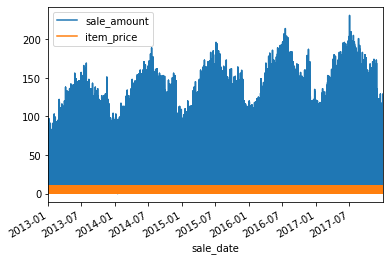

In [18]:
df_sub = df_sales[['sale_amount', 'item_price', 'sale_date']].set_index('sale_date')
df_sub.plot()
plt.show()

3. **Set the index to be the datetime variable.**

In [20]:
df_sales1 = df_sales.set_index('sale_date')
df_sales1.head()

,sale_id,item_id,sale_amount,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-02 00:00:00+00:00,2,1,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-03 00:00:00+00:00,3,1,14.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-04 00:00:00+00:00,4,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-05 00:00:00+00:00,5,1,10.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


4. **Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.**

5. **Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.**

6. **Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.**

7. **Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.**

### Using the OPS data acquired in lesson 1 exercises:

1. **Convert date column to datetime format.**

2. **Plot the distribution of each of your variables.**

3. **Set the index to be the datetime variable.**

4. **Add a month and a year column to your dataframe.**

5. **Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.**